In [30]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from scipy.stats import mstats
from sklearn.cross_decomposition import PLSRegression
import statsmodels.formula.api as smf
import os

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [3]:
os.chdir('C:\\Users\\liuth\Documents\\Python Scripts\\ThinkfulProjects\Data')

In [4]:
df = pd.read_excel("table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls", skiprows=4)

---

Cleaning Data

In [5]:
df['Murder'] = df['Murder and\nnonnegligent\nmanslaughter']
df['Property_Crime'] = df['Property\ncrime']
df['Rape'] = df['Rape\n(revised\ndefinition)1']
df['Rapeleg'] = df['Rape\n(legacy\ndefinition)2']
df['Arson3'] = df['Arson3']
df['AA'] = df['Aggravated\nassault']
df['Larceny'] = df['Larceny-\ntheft']
df['GTA'] = df['Motor\nvehicle\ntheft']
df['Population'] = np.log(df['Population'])
#df['Population'] = mstats.winsorize(df['Population'], limits=0.05)

In [6]:
data = df[['Population', 'Murder', 'Property_Crime', 'Rapeleg', 'Arson3', 'AA', 'GTA', 'Burglary', 'Larceny','Robbery',]].fillna(0)

---

Exploring the Data

In [7]:
im=smf.ols(formula='Population~Murder+Property_Crime+Rapeleg+Arson3+AA+GTA+Burglary+Larceny+Robbery', data=data).fit()

In [8]:
im.params
im.pvalues
im.rsquared
im.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     25.55
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           7.42e-31
Time:                        14:11:51   Log-Likelihood:                -555.24
No. Observations:                 351   AIC:                             1128.
Df Residuals:                     342   BIC:                             1163.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.3792      0.075    112.443      0.000       8.233       8.526
Murder            -0.0775      0.090     -0.863      0.389      -0.254       0.099
Property_Crime     0.0042      0.002      2.603      0.010       0.001       0.007
Rapeleg           -0.0257      0.031     -0.830      0.407      -0.087       0.035
Arson3            -0.0102      0.013     -0.787      0.432      -0.036       0.015
AA                -0.0023      0.003     -0.718      0.473      -0.009       0.004
GTA                0.0099      0.006      1.687      0.093      -0.002       0.021
Burglary          -0.0037      0.003     -1.300      0.194      -0.009       0.002
Larceny           -0.0019      0.002     -1.223      0.222      -0.005       0.001
Robbery           -0.0125      0.006     -1.985      0.048      -0.025      -0.000
==============================================================================
Omnibus:                      263.710   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6533.802
Skew:                          -2.815   Prob(JB):                         0.00
Kurtosis:                      23.373   Cond. No.                     4.31e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

---

Windsorize Data and Re-Explore

In [9]:
def remove_outliers(data):
    return mstats.winsorize(data, limits=0.05)

for d in data.columns:
    data[d] = remove_outliers(data[d])

In [10]:
im=smf.ols(formula='Population~Murder+Property_Crime+Rapeleg+Arson3+AA+GTA+Burglary+Larceny+Robbery', data=data).fit()

In [11]:
im.params
im.pvalues
im.rsquared
im.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     60.91
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           1.16e-65
Time:                        14:11:51   Log-Likelihood:                -369.85
No. Observations:                 351   AIC:                             759.7
Df Residuals:                     341   BIC:                             798.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.2085      0.050    163.852      0.000       8.110       8.307
Murder             0.1605      0.109      1.473      0.142      -0.054       0.375
Property_Crime     0.0040      0.002      1.710      0.088      -0.001       0.009
Rapeleg           -0.0476      0.029     -1.654      0.099      -0.104       0.009
Arson3             0.0391      0.054      0.719      0.472      -0.068       0.146
AA                 0.0099      0.006      1.771      0.078      -0.001       0.021
GTA                0.0017      0.008      0.208      0.835      -0.014       0.018
Burglary           0.0020      0.003      0.581      0.562      -0.005       0.009
Larceny           -0.0018      0.002     -0.768      0.443      -0.006       0.003
Robbery           -0.0279      0.009     -3.188      0.002      -0.045      -0.011
==============================================================================
Omnibus:                       16.006   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.223
Skew:                           0.228   Prob(JB):                      0.00994
Kurtosis:                       2.350   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

Finding Correlation for feature selection

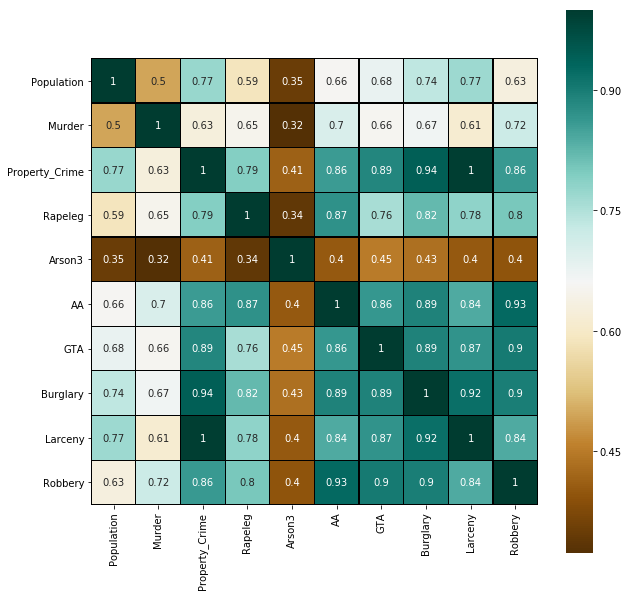

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), linewidths=0.1, square=True, cmap = "BrBG", linecolor='black', annot=True, ax=ax)

---

Creating Features

In [13]:
data2 = pd.DataFrame()

In [14]:
data2['Population'] = data['Population']
data2['Population2'] = data['Population']**2
data2['Murder'] = data['Murder']
data2['Robbery'] = data['Robbery']
data2['Property_Crime'] = data['Property_Crime']
data2['Arson3'] = data['Arson3']
data2['AA'] = data['AA']
data2['Rapleg'] = df['Rapeleg']
data2['GTA'] = df['GTA']
data2['Burglary'] = data['Burglary']
data2['Larceny'] = data['Larceny']
data2['Robbery'] = data['Robbery']

data2.shape

(351, 11)

---

Building and Fitting the Linear Regression Model

In [15]:
regr = linear_model.LinearRegression()
Y = data['Population'].values.reshape(-1, 1)
X = data[['Murder','Robbery','Property_Crime']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.16646775 -0.01478279  0.00265954]]

Intercept: 
 [8.24384219]

R-squared:
0.6057082326720137


In [16]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder,Robbery,Property_Crime
Murder,1.000,0.721,0.628
Robbery,0.721,1.000,0.861
Property_Crime,0.628,0.861,1.000


---

Extracting Predicted Values

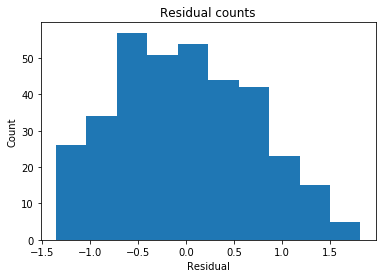

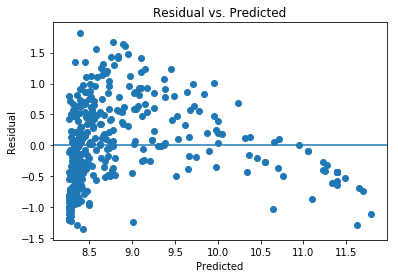

In [17]:
predicted = regr.predict(X).ravel()
actual = data2['Population']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
axes = plt.gca()
plt.title('Residual vs. Predicted')
plt.show()

In [18]:
model = regr.fit(X, Y)
cross_val_score(model, X, Y, cv=5)

array([0.65723581, 0.53692482, 0.48417967, 0.58542523, 0.65114742])

---

Adjusting the skewness

In [19]:
regr = linear_model.LinearRegression()
Y = data['Population'].values.reshape(-1, 1)
X = data[['Murder','Robbery','Property_Crime']]
rob_2 = [math.sqrt(x) for x in data['Robbery']]
murd2 = [math.sqrt(x) for x in data['Murder']]
X = data[['Property_Crime']]
X['rob_2'] = rob_2
X['murd2'] = murd2
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.00145833  0.1791901  -0.0486987 ]]

Intercept: 
 [8.22655487]

R-squared:
0.618003123632993


C:\Users\liuth\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\liuth\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


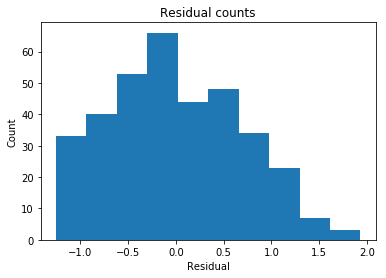

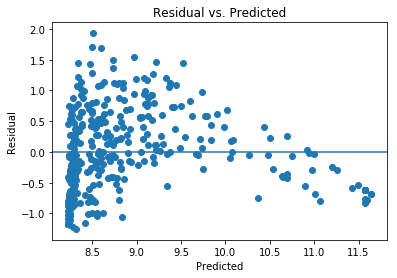

In [20]:
predicted = regr.predict(X).ravel()
actual = data2['Population']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
axes = plt.gca()
plt.title('Residual vs. Predicted')
plt.show()

In [22]:
X.corr()

,Property_Crime,rob_2,murd2
Property_Crime,1.000,0.898,0.613
rob_2,0.898,1.000,0.656
murd2,0.613,0.656,1.000


In [24]:
model = regr.fit(X, Y)
cross_val_score(model, X, Y, cv=5)

array([0.62882654, 0.53039918, 0.53315057, 0.64326569, 0.65405211])

---

Adjusting Skewness

In [25]:
regr = linear_model.LinearRegression()
Y = data['Population'].values.reshape(-1, 1)
X = data[['Murder','Robbery','Property_Crime']]
rob_2 = [math.sqrt(x) for x in data['Robbery']]
murd2 = [math.sqrt(x) for x in data['Murder']]
prop2 = [math.sqrt(x) for x in data['Property_Crime']]
X = data[['Property_Crime']]
X['rob_2'] = rob_2
X['murd2'] = murd2
X['prop2'] = prop2
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.00245789  0.05627781  0.12732667  0.17653874]]

Intercept: 
 [7.09281292]

R-squared:
0.773346785783712


C:\Users\liuth\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\liuth\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\liuth\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

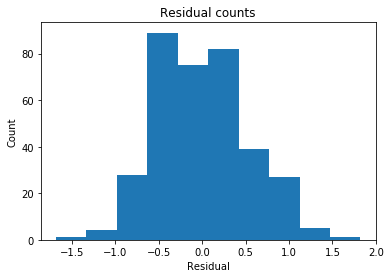

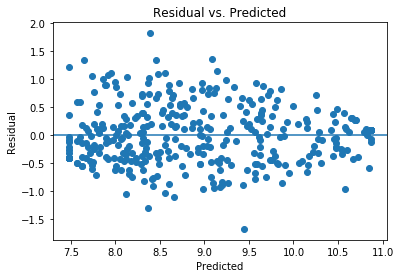

In [26]:
predicted = regr.predict(X).ravel()
actual = data2['Population']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
axes = plt.gca()
plt.title('Residual vs. Predicted')
plt.show()

In [27]:
model = regr.fit(X, Y)
cross_val_score(model, X, Y, cv=5)

array([0.7999348 , 0.71885618, 0.66743725, 0.79804713, 0.79154281])

---

Dimension Reduction using PLSR

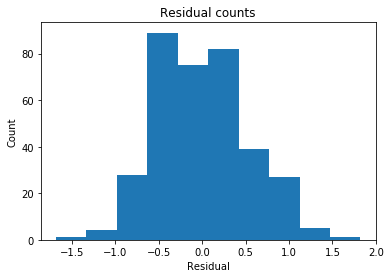

R-squared regression: 0.773346785783712
R-squared PLSR: 0.7608802569958801


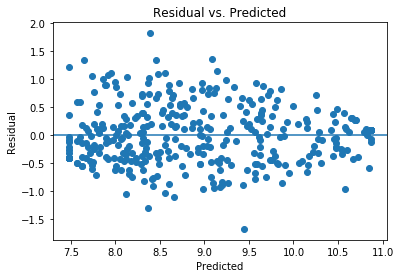

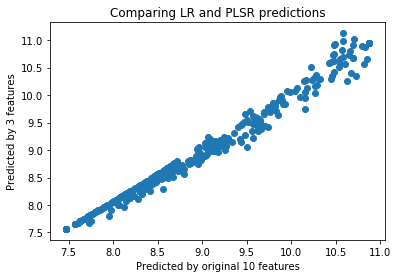

In [39]:
predicted = regr.predict(X).ravel()
actual = data2['Population']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, Y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, Y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, Y))

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
axes = plt.gca()
plt.title('Residual vs. Predicted')
plt.show()

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()